In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('train.csv')
print(df.head(3))

   uniqueID    drugName                     condition  \
0    206461   Valsartan  Left Ventricular Dysfunction   
1     95260  Guanfacine                          ADHD   
2     92703      Lybrel                 Birth Control   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   

   usefulCount  
0           27  
1          192  
2           17  


In [3]:
print(df.shape[0])

161297


<p> No. of Rows in the Datatset = 161297</p>

In [4]:
print(df.shape[1])

7


<p> No. of columns in the dataset = 7 </p>

<h4> Column Name </h4>

In [5]:
print(df.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


<h4> Column Description </h4>
<ul>
<li> <b>uniqueID : </b> Unique ID associated with each review </li>
<li> <b> Drugname : </b> Prescribed Drug Name </li>
<li> <b> Condition : </b> Condition in which the particular drug is prescribed. </li>
<li> <b> Review :</b> Patient Review </li>
<li> <b> Rating : </b> Rating given by the patient</li>
<li> <b> Date :</b> Date of review entry </li>
<li> <b> Useful Count :</b>Number of users who found review useful. </li>
</ul>

<ul> <b> Independant Variable </b> 
<li> uniqueID </li>
<li> DrugName </li>
<li> Condition </li>
<li> Review </li>
<li> Date</li>
<li> Useful Count</li>
</ul>
<ul> <b> Dependant Variable </b>
<li> Rating </li>
</ul>

In [6]:
print(df['rating'].value_counts())

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64


(array([21619.,  6931.,  6513.,  5012.,  8013.,  6343.,  9456., 18890.,
        27531., 50989.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

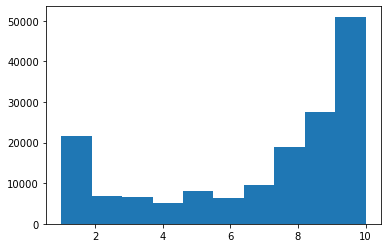

In [7]:
plt.hist(df['rating'])

<p> Max. Rating = 10 followed by 9 and 1</p>

In [8]:
df['Rating'] = 1
df['Rating'] = np.where(df["rating"] <= 5, 0, df['Rating'])

<p> New Column is created based on the rating column in the original dataset.If the rating given by the patient is more than 5 then it will be considered as good medicine for the particular condition. For the good medicine Rating is given as 1 otherwise 0.</p>

<p> Drop : rating column </p>

In [9]:
df.drop('rating',axis=1,inplace = True)

In [10]:
print(df['Rating'].value_counts())

1    113209
0     48088
Name: Rating, dtype: int64


(array([ 48088.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 113209.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

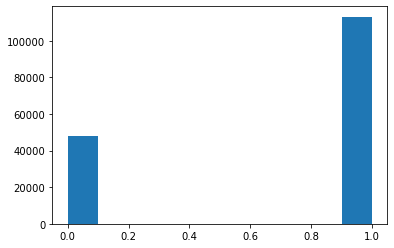

In [11]:
plt.hist(df['Rating'])

<h3> This is imbalanced dataset. Count of medicines having good reviews are more than positive ones (nearly twice). </h3>

Text(0, 0.5, 'Drug')

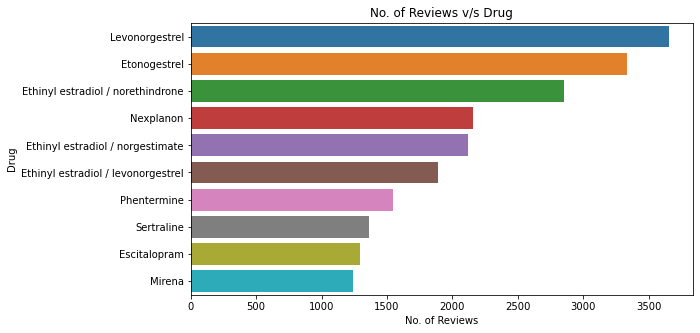

In [12]:
drug = df['drugName'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='drugName', order=drug)
plt.title('No. of Reviews v/s Drug')
plt.xlabel('No. of Reviews')
plt.ylabel('Drug')

<p> Drug which got the maximum reviews from the Patient is Levonorgestrel followed by Etonogestrel ,norethindrone and Nexplanon.</p>

In [13]:
!pip install wordcloud


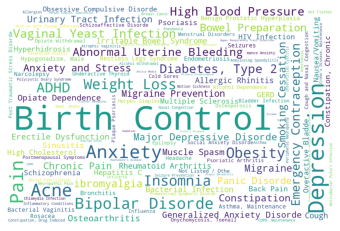

In [14]:
from wordcloud import WordCloud
data = df['condition'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='white',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()


<p> Major conditions in which the drugs are prescribed . </p>
<ul><li>
Birth Control </li>
<li> Depression </li>
<li> Pain</li>
<li> Anxiety </li>
<li> Acne </li>
<li> Insomnia</li>
</ul>

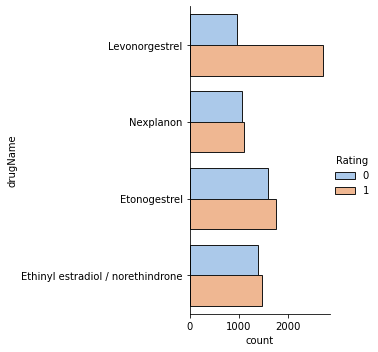

In [15]:
df_new = df[(df['drugName'] == 'Levonorgestrel') | (df['drugName'] == 'Etonogestrel') | (df['drugName'] == 'Ethinyl estradiol / norethindrone') | (df['drugName'] == 'Nexplanon')]
sns.catplot(y="drugName", hue="Rating", kind="count",
            palette="pastel", edgecolor=".10",
            data=df_new)


<p> Out of top 4 drugs which got the maximum reviews , Levonorgestrel are the one which got maximum positive reviews.</p>

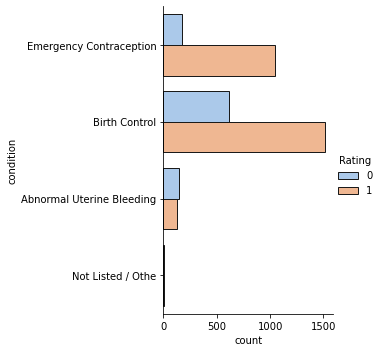

In [16]:
dfnew =  df[(df['drugName'] == 'Levonorgestrel')]
sns.catplot(y="condition", hue="Rating", kind="count",
            palette="pastel", edgecolor=".10",
            data=dfnew)


<p> From the above plot we can conclude that Levonorgestrel drug is effective in Emergency Contraception and Birth Control Condition </p>

<h5> Positive Reviews highlighted word </h5>

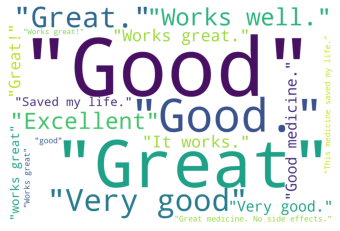

In [17]:
dfnew =  df[(df['Rating'] == 1)]
data = dfnew['review'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='white',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()


<h5> Negative Reviews highlighted word </h5>

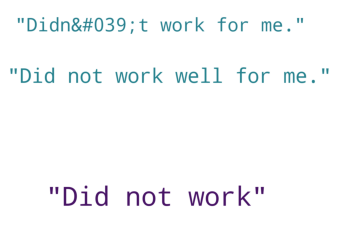

In [18]:
dfnew =  df[(df['Rating'] == 0)]
data = dfnew['review'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='white',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()


(113209, 7)


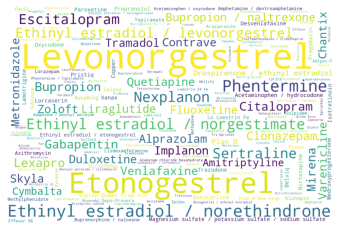

In [19]:
from wordcloud import WordCloud
dfnew = df[df['Rating'] == 1 ]
print(dfnew.shape)
data = dfnew['drugName'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='white',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()


<ul> Drugs having maximum good reviews are as follows :
    <li> Levonorgestrel </li>
    <li> Etonogestrel </li>
    <li> Ethinyl estradiol / norethindrone </li>
    <li> Nexplanon </li>
    <li> Phentermine </li>
    </ul>

<h2> Data Cleaning </h2>

<p> Finding out the null values </p>

In [21]:
print(df.isna().sum())

uniqueID         0
drugName         0
condition      899
review           0
date             0
usefulCount      0
Rating           0
dtype: int64


<p> Column : <b> condition </b> have null values </p>

In [22]:
condition_null = df['condition'].isna().sum()
total_rows = df.shape[0]
print("Percentage of null values in condition column = ",(condition_null  / total_rows) *100)

Percentage of null values in condition column =  0.5573569254232875


<p> Percentage of null  values in the condition column is less than 1 so we can easily drop those rows in which the condition column have null values.</p>

<h4> Selecting rows which contains non-null values in all the columns </h4>

In [23]:
df = df[df.condition.str.len().gt(0)]

In [24]:
print(df.shape[0])

160398


<p> Rows in the new dataset = 160398 </p>

In [25]:
print(df[df['condition'].str.contains('</span')])

        uniqueID        drugName                                    condition  \
105       220696  Loestrin 24 Fe   2</span> users found this comment helpful.   
196        67383         Provera   4</span> users found this comment helpful.   
243        81588             Yaz   3</span> users found this comment helpful.   
264       132965  Loestrin 24 Fe   4</span> users found this comment helpful.   
391        91050           Norco  11</span> users found this comment helpful.   
...          ...             ...                                          ...   
160322    173464            Alli  99</span> users found this comment helpful.   
160791    150010            Soma  62</span> users found this comment helpful.   
160899    209239          Geodon   7</span> users found this comment helpful.   
160921     96527       Neurontin  92</span> users found this comment helpful.   
161222    206868            Duac   7</span> users found this comment helpful.   

                           

<p> In the conditon column : there exists some rows which are useless as they might be misfilled :  </span></p>

<h4> Deleting rows from the dataset which contains </span> in the condition column </h4>

In [26]:
df = df[~df['condition'].str.contains('</span')]

In [27]:
print(df.shape)

(159498, 7)


<h4> Dropping Duplicate Rows </h4>

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
print(df.shape)

(159498, 7)


In [30]:
df.uniqueID.nunique()

159498

<p> All the uniqueID is unique (no duplicated in uniqueID column) </p>

<p><b> Converting each word into the lowercase </b> </p>

In [31]:
df['drugName'] = df['drugName'].str.lower()
df['condition'] = df['condition'].str.lower()
df['review'] = df['review'].str.lower()

In [32]:
print(df.head(5))

   uniqueID                  drugName                     condition  \
0    206461                 valsartan  left ventricular dysfunction   
1     95260                guanfacine                          adhd   
2     92703                    lybrel                 birth control   
3    138000                ortho evra                 birth control   
4     35696  buprenorphine / naloxone             opiate dependence   

                                              review       date  usefulCount  \
0  "it has no side effect, i take it in combinati...  20-May-12           27   
1  "my son is halfway through his fourth week of ...  27-Apr-10          192   
2  "i used to take another oral contraceptive, wh...  14-Dec-09           17   
3  "this is my first time using any form of birth...   3-Nov-15           10   
4  "suboxone has completely turned my life around...  27-Nov-16           37   

   Rating  
0       1  
1       1  
2       0  
3       1  
4       1  


<p><b> Adding column day,month,year for date column </b> </p>

In [33]:
df['date'] = pd.to_datetime(df['date'])
#extract the year
df['year'] = df['date'].dt.year
#extract the month
df['month'] = df['date'].dt.month
#extract the day
df['day'] = df['date'].dt.day

In [34]:
df.drop('date',axis=1,inplace=True)

<h4> Columns in Dataset </h4>

In [35]:
print(df.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'usefulCount', 'Rating',
       'year', 'month', 'day'],
      dtype='object')


In [21]:
import nltk
nltk.download('stopwords')
# For tokenization
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('-',' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [39]:
df['drugName'] = preprocess_text(df['drugName'].values)

100%|██████████████████████████████████████████████████████████████████████| 159498/159498 [00:01<00:00, 100655.74it/s]


In [40]:
df['condition'] = preprocess_text(df['condition'].values)

100%|███████████████████████████████████████████████████████████████████████| 159498/159498 [00:01<00:00, 97424.80it/s]


In [24]:
df['review'] = preprocess_text(df['review'].values)
print(df['review'])

100%|███████████████████████████████████████████████████████████████████████| 161297/161297 [00:08<00:00, 19345.17it/s]

0         side effect take combination bystolic 5 mg fis...
1         son halfway fourth week intuniv became concern...
2         used take another oral contraceptive 21 pill c...
3         first time using form birth control 039 glad w...
4         suboxone completely turned life around feel he...
                                ...                        
161292    wrote first report mid october 2014 alcohol si...
161293    given iv surgey immediately became anxious cou...
161294    limited improvement 4 months developed bad ras...
161295    039 thyroid medication 49 years spent first 38...
161296    039 chronic constipation adult life tried linz...
Name: review, Length: 161297, dtype: object


In [42]:
print(df['review'])

0         side effect take combination bystolic 5 mg fis...
1         son halfway fourth week intuniv became concern...
2         used take another oral contraceptive 21 pill c...
3         first time using form birth control 039 glad w...
4         suboxone completely turned life around feel he...
                                ...                        
161292    wrote first report mid october 2014 alcohol si...
161293    given iv surgey immediately became anxious cou...
161294    limited improvement 4 months developed bad ras...
161295    039 thyroid medication 49 years spent first 38...
161296    039 chronic constipation adult life tried linz...
Name: review, Length: 159498, dtype: object


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, stratify=dfnew['Rating'], random_state=888)

y_train = X_train['Rating']

y_test = X_test['Rating']


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['uniqueID'].values.reshape(-1, 1))

X_train_normalized_uniqueID = normalizer.transform(X_train['uniqueID'].values.reshape(-1,1))
X_test_normalized_uniqueID = normalizer.transform(X_test['uniqueID'].values.reshape(-1,1))

normalizer.fit(X_train['year'].values.reshape(-1, 1))

X_train_normalized_uniqueID = normalizer.transform(X_train['year'].values.reshape(-1,1))
X_test_normalized_uniqueID = normalizer.transform(X_test['year'].values.reshape(-1,1))

normalizer.fit(X_train['month'].values.reshape(-1, 1))

X_train_normalized_uniqueID = normalizer.transform(X_train['month'].values.reshape(-1,1))
X_test_normalized_uniqueID = normalizer.transform(X_test['month'].values.reshape(-1,1))

normalizer.fit(X_train['day'].values.reshape(-1, 1))

X_train_normalized_uniqueID = normalizer.transform(X_train['day'].values.reshape(-1,1))
X_test_normalized_uniqueID = normalizer.transform(X_test['day'].values.reshape(-1,1))
